## Importing necessary libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [29]:
df = pd.read_csv("car data.csv")

## Looking for duplicated data and null values and removing them if exists

In [30]:
df.duplicated().sum()

2

Insight: Two duplicated records have been found. 

#### Removing them

In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

Insight: No null value have been found.

In [33]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Considering the Selling Price of the cares given are the selling price of the year 2024.
#### According to the above consideration, let us make a new feature Car_Age to the data.

In [34]:
df['Car_Age'] = 2024 - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


#### Dropping the feature 'Year' from the data as it is of no use any more.

In [35]:

df.drop(columns='Year', axis=1, inplace=True)

In [36]:
df.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


## Visualizations

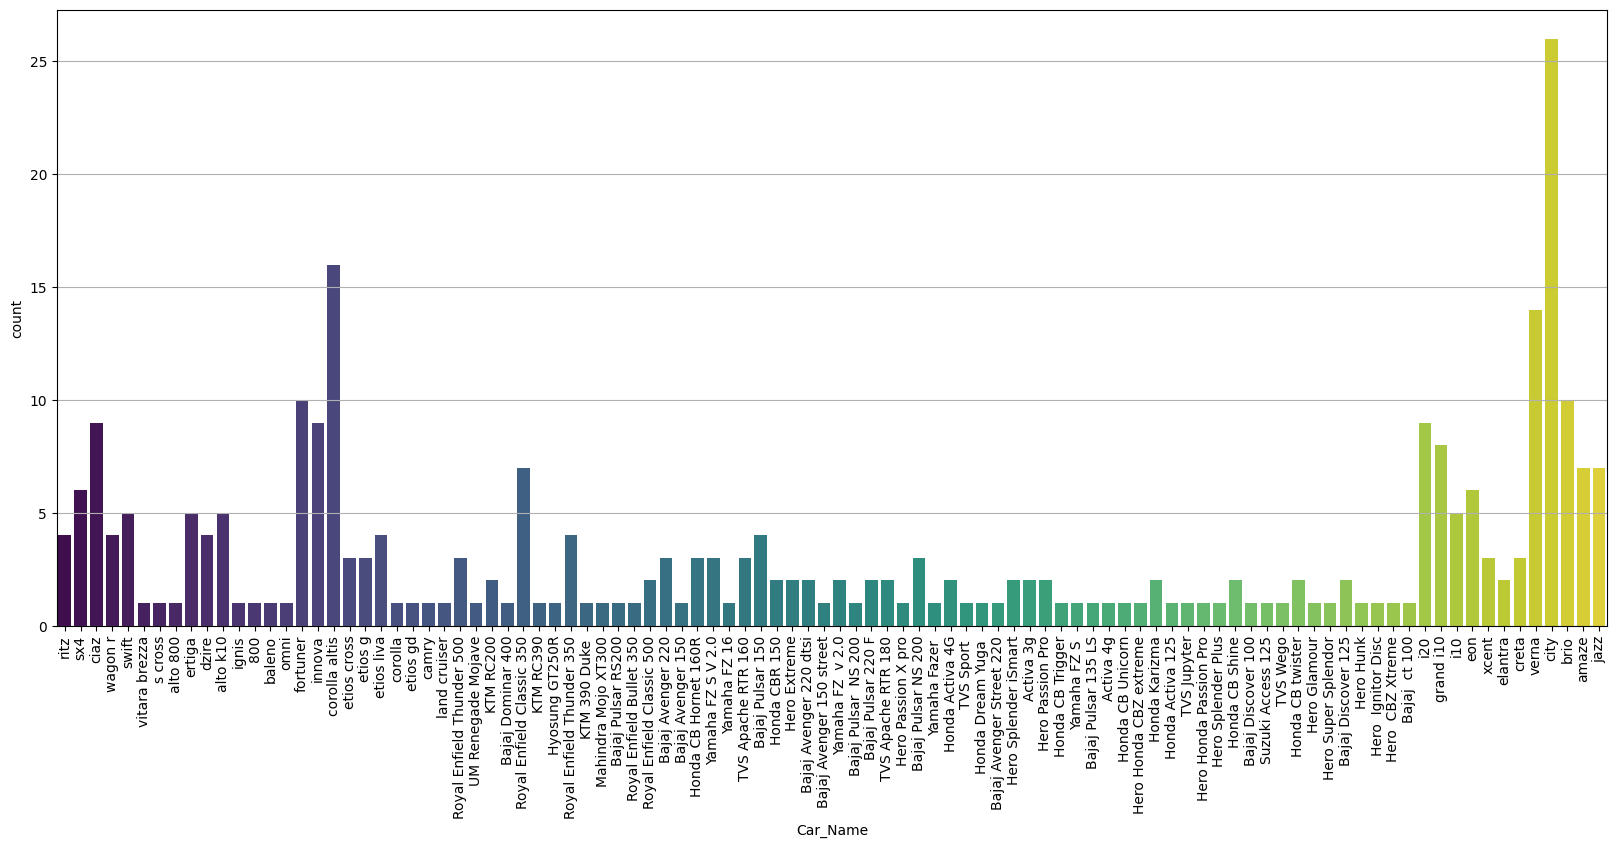

In [37]:
plt.figure(figsize=(20, 8))
sns.countplot(df, x='Car_Name', palette='viridis')
plt.xticks(rotation=90)
plt.grid(axis='y')

Insight: In this record, maximum number of cars recorded is 'city'(26).

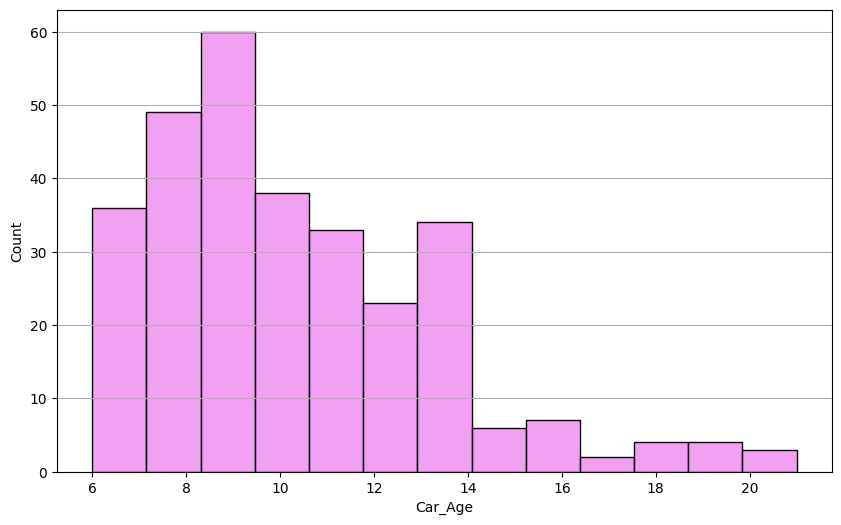

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Car_Age', palette='flare', color='violet')
plt.grid(axis='y', zorder=3)

Insight: Most of the cars are of age between 6 and 14.

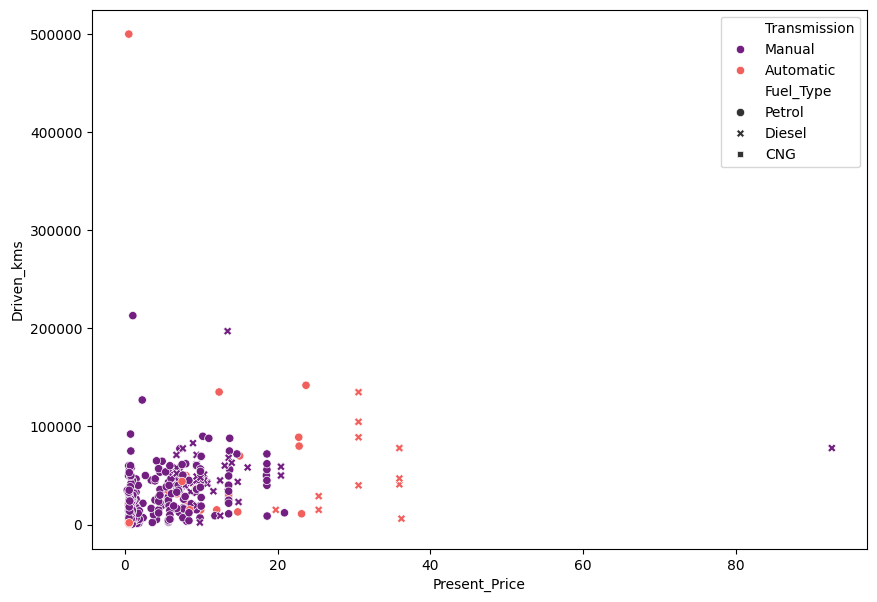

In [39]:
plt.figure(figsize=(10, 7))
sns.scatterplot(df, x='Present_Price', y='Driven_kms', hue='Transmission', style='Fuel_Type', palette='magma')
plt.xscale('linear')

Insight: Cars above 22 lac are mostly having auto transmission and all of them are diesel cars. Only one car with manual transmission is of nearly 1 cr.

Only 3 cars have been found driven over 1.5 lac km.

This plotting shows a cluster within the range of cars pricing upto 20 lac and driven upto 1 lac km. that means it deffinitely contains outliers.

In [40]:
df['Selling_type'].value_counts()

Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64

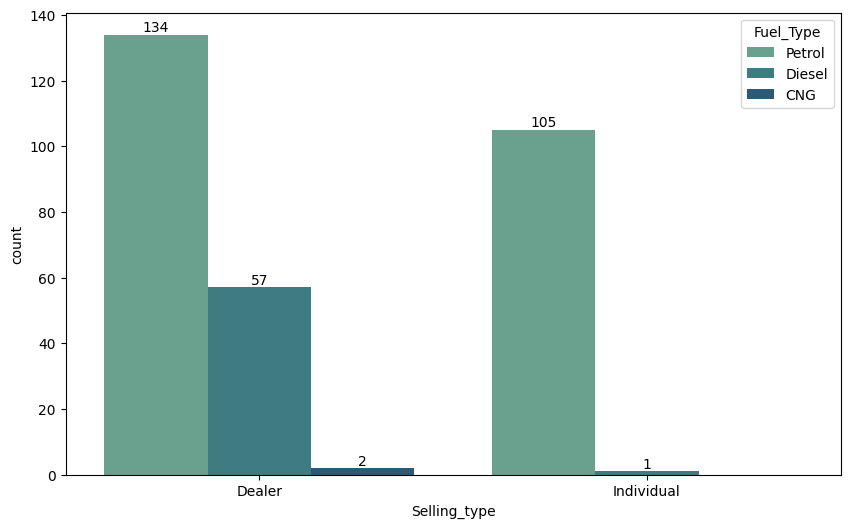

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(df, x='Selling_type', hue='Fuel_Type', palette='crest')
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

Insight: There are 193  car selling through dealers and 106 of that by individuals.
No CNG car was sold by an individual. 
In this data, 239 cars are of petrol, 58 cars are of diesel and only 2 cars are of CNG.

## Processing of data

#### Encoding and Scaling

In [42]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
encoder = LabelEncoder()
scaler = StandardScaler()

cat_cols = [i for i in df.columns if df[i].dtype == 'O']

for i in cat_cols:
    df[i] = encoder.fit_transform(df[i])

for i in ['Present_Price', 'Driven_kms', 'Car_Age', 'Owner']:
    df[i] = encoder.fit_transform(df[i])

df.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,90,3.35,58,86,2,0,1,0,4
1,93,4.75,105,135,1,0,1,0,5
2,68,7.25,107,26,2,0,1,0,1
3,96,2.85,49,18,2,0,1,0,7
4,92,4.60,74,134,1,0,1,0,4


#### Splitting into input data and target variable

In [43]:
from sklearn.model_selection import train_test_split

x = df.drop(columns='Selling_Price', axis=1)
y = df['Selling_Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((209, 8), (209,), (90, 8), (90,))

## Model Building

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor()
params = {
    'max_depth': [1, 2, 3, 5],
    'n_estimators': [50, 100, 200],
    'criterion': ['squared_error', 'absolute_error', 'poisson']
}
model = GridSearchCV(reg, param_grid=params, cv=5, verbose=3, scoring='r2')
model.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END criterion=squared_error, max_depth=1, n_estimators=50;, score=-0.013 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=1, n_estimators=50;, score=0.518 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=1, n_estimators=50;, score=0.524 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=1, n_estimators=50;, score=0.725 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=1, n_estimators=50;, score=0.619 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=1, n_estimators=100;, score=-0.059 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_depth=1, n_estimators=100;, score=0.504 total time=   0.3s
[CV 3/5] END criterion=squared_error, max_depth=1, n_estimators=100;, score=0.515 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_depth=1, n_estimators=100;, score=0.714 total time=   0.2s
[CV 5/5] END criterion=squared_e

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [1, 2, 3, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=3)

In [46]:
model.best_score_, model.best_params_

(-4.185987274838849,
 {'criterion': 'absolute_error', 'max_depth': 5, 'n_estimators': 100})

## Prediction and Accuracy check

In [49]:
from sklearn.metrics import root_mean_squared_error, r2_score

y_pred = model.predict(x_test)
print(f"RMSE: {root_mean_squared_error(y_test, y_pred)}")
print(f"R2_Score: {r2_score(y_test, y_pred)}")

RMSE: 2.050195690961261
R2_Score: 0.8692460495328
